In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Uniform
from nengo.processes import Piecewise

import math

In [ ]:
### CREATE THE SIN AND COS MATRICES

# curveA = []
# curveB = []

# x = 0
# for i in range(100):

#     curveA.append([round(x, 2), round(math.sin(x), 5)]) ## Curve A (sin)
#     curveB.append([round(x, 2), round(math.cos(x), 5)]) ## Curve B (cos)

#     x += 0.02

In [97]:
model = nengo.Network(label="DTW")


### TEST CURVES
curveA = [
    [0.02, 0.1],
    [0.04, 0.3],
    [0.06, 0.4],
    [0.08, 0.9],
    [0.1, 0.8],
    [0.12, 0.2],
    [0.14, 0.1],
    [0.16, 0.5],
    [0.18, 0.7],
    [0.2, 0.3],
]
curveB = [
    [0.02, 0.1],
    [0.04, 0.6],
    [0.06, 0.2],
    [0.08, 0.3],
    [0.1, 0],
    [0.12, 0.9],
    [0.14, 0.4],
    [0.16, 0.3],
    [0.18, 0.6],
    [0.2, 0.3],
]

costMatrix = []

numPoints = len(curveA)

with model:

    def absVal(x):
        return abs(x)

    def neg(x):
        return x * -1

    for r in range(numPoints):

        costMatrix.append([])

        for c in range(numPoints):

            below = 10
            belowLeft = 10
            left = 10

            input_neuronA = nengo.Ensemble(100, dimensions=1)
            input_neuronB = nengo.Ensemble(100, dimensions=1)

            absValCalc = nengo.Ensemble(100, dimensions=1)
            negative = nengo.Ensemble(100, dimensions=1)
            difference = nengo.Ensemble(100, dimensions=1)
            DTWsum = nengo.Ensemble(100, dimensions=1)

            input_nodeA = nengo.Node(output=curveA[r][1])
            input_nodeB = nengo.Node(output=curveB[c][1])

            nengo.Connection(
                input_nodeA, input_neuronA
            )  ## Connect the node to the neuron ensemble
            nengo.Connection(input_nodeB, input_neuronB)

            nengo.Connection(
                input_neuronB, negative, function=neg
            )  ## Flip the number negative to subtract

            nengo.Connection(negative, difference)  ## Subtraction
            nengo.Connection(input_neuronA, difference)  ## Subtraction

            nengo.Connection(difference, absValCalc, function=absVal)

            ### START CALCULATING MINIMUMS, TODO: IMPLEMENT NEURON DYNAMICS

            if r > 0:
                below = costMatrix[r - 1][c]

            if c > 0:

                left = costMatrix[r][c - 1]

            if r > 0 & c > 0:

                belowLeft = costMatrix[r - 1][c - 1]

            addNum = nengo.Node(output=min(below, left, belowLeft))

            if addNum == 10:
                addNum = 0

            nengo.Connection(absValCalc, DTWsum)
            nengo.Connection(addNum, DTWsum)

            costMatrix[r].append(DTWsum)

    ### neuron_probe = nengo.Probe(difference, synapse = 0.1) ## Probe the neuron ensemble

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

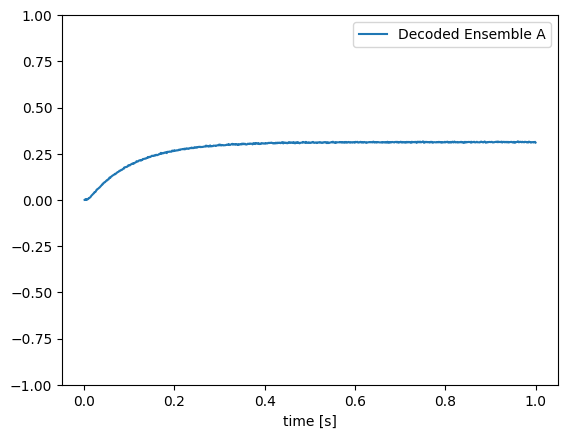

In [98]:
### USED FOR TESTING


# with nengo.Simulator(model) as sim:
#     # Run it for 5 seconds
#     sim.run(1)

# # Plot the input signals and decoded ensemble values
# # t = sim.trange()
# # plt.figure()
# # plt.plot(sim.trange(), sim.data[spikes], label="Decoded Ensemble A")
# # plt.legend()
# # plt.ylim(-1, 1)
# # plt.xlabel("time [s]")
# # plt.show()

# t = sim.trange()
# plt.figure()
# plt.plot(sim.trange(), sim.data[neuron_probe], label="Decoded Ensemble A")

# plt.legend()
# plt.ylim(-1, 1)
# plt.xlabel("time [s]")
# plt.show()